<a href="https://colab.research.google.com/github/spe301/CNN-tutorial/blob/main/CNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A beginner's guide to Convolutional Neural Networks

Convolutional Neural Networks (CNNs) were originally created by Yahn LeCunn in the 1980's during his Post-Docand are designed for computer vision tasks including image classification. It wasn't until the data explosion of the 2010's, however, that they started getting used in the real world. In this tutorial I'll walk you through the process of building a CNN in Keras, data preprocessing, interpreting results, and finish with some OOP to help streamline this process. This will be done in colabs, this way it'll work on anybody's machine. For better context, we are building a CNN that can classify handwritten digits. The CNN will be trained on 60,000 images of handwritten digits and tested on 10,000.

Let's import our dependencies first, the functions below will help us view the CNN's loss and accuracy throughout training.

In [ ]:
from tensorflow.keras import models, layers # for the CNN model
from tensorflow.keras.datasets import mnist, cifar10 # our dataset
import numpy as np # does some math for us
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder #will help us transform the labels

def ViewAccuracy(history):
  '''plots a model's accuracy throughout training'''
  plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'], label='train');
  plt.plot(list(range(len(history.history['accuracy']))), history.history['val_accuracy'], label='val');
  plt.legend(loc='best')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  return None


def ViewLoss(history):
  '''plots a model's loss throughout training'''
  plt.plot(list(range(len(history.history['loss']))), history.history['loss'], label='train');
  plt.plot(list(range(len(history.history['loss']))), history.history['val_loss'], label='val');
  plt.legend(loc='best')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  return None

Next, we split the training and testing data. Do keep in mind that the mnist.load_data() from keras makes this process more simple than it would be otherwise.

In [ ]:
train, test = mnist.load_data()
train_images, train_labels = train
test_images, test_labels = test

In [ ]:
# inspecting our data's shape
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

These numbers essentially mean that we will train the computer on 60,000 images, these are handwritten digits by the way, and test it on 10,000. each image is 28x28 pixels in size and is on a binary color scale. This means that all the pixels are on a specrum between two colors(i.e. black and white), as opposed to being in color and having a value for red, blue, and green. here's an example of one of our images

(<matplotlib.image.AxesImage at 0x7f34effddd50>, 5)

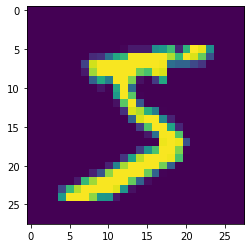

In [ ]:
selected = 0
image = train_images[selected]
label = train_labels[selected]
plt.imshow(image), label

Next, we will build our model. Our model will have 3 convolutional blocks, each with 28 filters. We add a pooling layer in between each convolutional layer and we add a flatten layer after the last convolution. The reason for this is to generate the final output.

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
cnn.compile(metrics='accuracy', optimizer='rmsprop', loss='categorical_crossentropy')
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Model Training

In [ ]:
X = train_images.reshape(60000, 28, 28, 1)
Xval = test_images.reshape(10000, 28, 28, 1)
y = OneHotEncoder().fit_transform(train_labels.reshape(-1, 1)).toarray()
yval = OneHotEncoder().fit_transform(test_labels.reshape(-1, 1)).toarray()
history = cnn.fit(X, y, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 41s 53ms/step - loss: 1.6555 - accuracy: 0.8256 - val_loss: 0.0891 - val_accuracy: 0.9764
Epoch 2/10
750/750 [==============================] - 40s 53ms/step - loss: 0.0791 - accuracy: 0.9766 - val_loss: 0.0784 - val_accuracy: 0.9803
Epoch 3/10
750/750 [==============================] - 40s 53ms/step - loss: 0.0529 - accuracy: 0.9849 - val_loss: 0.0577 - val_accuracy: 0.9847
Epoch 4/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0745 - val_accuracy: 0.9814
Epoch 5/10
750/750 [==============================] - 40s 54ms/step - loss: 0.0341 - accuracy: 0.9904 - val_loss: 0.0586 - val_accuracy: 0.9846
Epoch 6/10
750/750 [==============================] - 40s 54ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 0.0751 - val_accuracy: 0.9867
Epoch 7/10
750/750 [==============================] - 40s 54ms/step - loss: 0.0294 - accuracy: 0.9922 - val_loss: 0.0599 - val_accuracy:

Accuracy and Loss throughout training

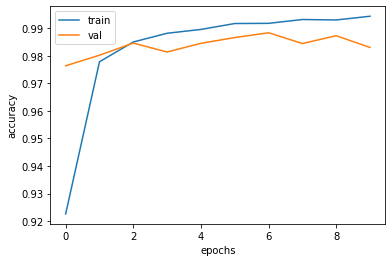

In [ ]:
ViewAccuracy(history)

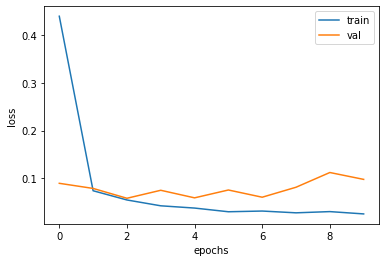

In [ ]:
ViewLoss(history)

Model evaluation

In [ ]:
cnn.evaluate(X, y, batch_size=64)

938/938 [==============================] - 15s 16ms/step - loss: 0.0375 - accuracy: 0.9915


[0.0375223383307457, 0.9915333390235901]

In [ ]:
cnn.evaluate(Xval, yval, batch_size=64)

157/157 [==============================] - 3s 17ms/step - loss: 0.0874 - accuracy: 0.9839


[0.08739908039569855, 0.9839000105857849]

In [ ]:
test_images[selected].shape

(28, 28)

Model prediction

predicted: 8, actual: 8


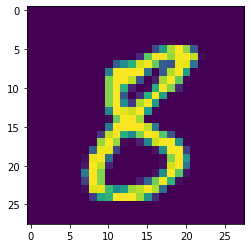

In [ ]:
selected = 879
predicted = cnn.predict(test_images[selected].reshape(1, 28, 28, 1)).argmax()
actual = test_labels[selected]
print('predicted: {}, actual: {}'.format(predicted, actual))
plt.imshow(test_images[selected])

Our model's accuracy is really good for training and testing both. However, the loss does indicate that there is some overfitting. We're going to see if we can fix these issues. In the end adding a dropout layer after the last convolutional layer was able to get the best results

Here is the code and summary for the better model

In [ ]:
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn2.add(layers.MaxPooling2D(2, 2))
cnn2.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn2.add(layers.MaxPooling2D(2, 2))
cnn2.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn2.add(layers.Dropout(0.5))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(64, activation='relu'))
cnn2.add(layers.Dense(10, activation='softmax'))
cnn2.compile(metrics='accuracy', optimizer='rmsprop', loss='categorical_crossentropy')
cnn2.summary()
history = cnn2.fit(X, y, batch_size=64, epochs=10, validation_split=0.2) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 56)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 504)              

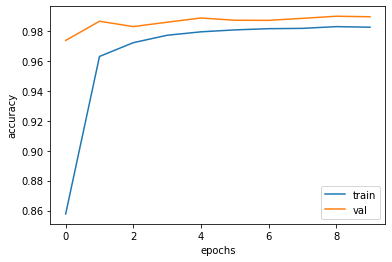

In [ ]:
ViewAccuracy(history)

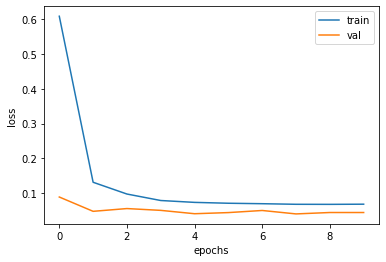

In [ ]:
ViewLoss(history)

In [ ]:
cnn2.evaluate(X, y, batch_size=64)

938/938 [==============================] - 15s 16ms/step - loss: 0.0281 - accuracy: 0.9924


[0.02806139551103115, 0.9923833608627319]

In [ ]:
cnn2.evaluate(Xval, yval, batch_size=64)

157/157 [==============================] - 3s 16ms/step - loss: 0.0423 - accuracy: 0.9893


[0.04227009788155556, 0.989300012588501]

This is doing better, our loss and accuracy is balanced for both training and testing data.

predicted: 2, actual: 2


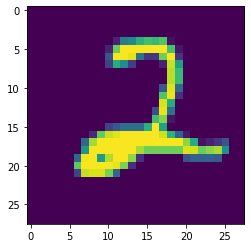

In [ ]:
selected = 208
predicted = cnn2.predict(test_images[selected].reshape(1, 28, 28, 1)).argmax()
actual = test_labels[selected]
print('predicted: {}, actual: {}'.format(predicted, actual))
plt.imshow(test_images[selected])

## Wrapping it all up

Just demonstrating a more streamlined approach to this process. This code block will allow us to do what we've already done but with cleaner and more reusable code.

In [ ]:
class CNN:

  def ViewAccuracy(self, history):
    '''plots a model's accuracy throughout training'''
    plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'], label='train');
    plt.plot(list(range(len(history.history['accuracy']))), history.history['val_accuracy'], label='val');
    plt.legend(loc='best')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    return None

  def ViewLoss(self, history):
    '''plots a model's loss throughout training'''
    plt.plot(list(range(len(history.history['loss']))), history.history['loss'], label='train');
    plt.plot(list(range(len(history.history['loss']))), history.history['val_loss'], label='val');
    plt.legend(loc='best')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    return None

  def ModelReady(self, image_data_tuple):
    '''organizes array converted images into training and validation sets'''
    train_images, train_labels = train
    test_images, test_labels = test 
    if len(train_images.shape) != 4:
      X = train_images.reshape(len(train_images), train_images.shape[1], train_images.shape[1], 1)
      Xval = test_images.reshape(len(test_images), test_images.shape[1], test_images.shape[1], 1)
    else:
      X = train_images
      Xval = test_images
    y = OneHotEncoder().fit_transform(train_labels.reshape(-1, 1)).toarray()
    yval = OneHotEncoder().fit_transform(test_labels.reshape(-1, 1)).toarray()
    return X, Xval, y, yval

  def BuildClassifier(self, output_dim, filters, channels, kernel, n_blocks, pool, activation, optimizer, dropout, metrics):
    '''Builds a CNN in accordinance with the specifications we give it'''
    if output_dim == 1:
      loss = 'mse'
      oa = 'linear'
    if output_dim == 2:
      loss = 'binary_crossentropy'
      oa = 'sigmoid'
    else:
      loss = 'categorical_crossentropy'
      oa = 'softmax'
    model = models.Sequential()
    model.add(layers.Conv2D(filters, (kernel, kernel), activation=activation, input_shape=(filters, filters, channels)))
    if n_blocks == 1:
      model.add(layers.MaxPool2D(pool, pool))
    for i in range(n_blocks - 1):
      model.add(layers.MaxPool2D(pool, pool))
      if dropout == True:
        model.add(layers.Dropout(0.5))       
      model.add(layers.Conv2D(filters*2, kernel, activation=activation))
      model.add(layers.Flatten())
      model.add(layers.Dense(64, activation=activation))
      model.add(layers.Dense(output_dim, activation=oa))
      model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
      return model

  def Train(self, X, y, model, epochs=10, batch_size=64, saving=True, filepath='model.h5', quiet=True):
    '''facilitates model training'''
    print(type(model))
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    if quiet == False:
      print(CNN().ViewAccuracy(history))
      print(CNN().ViewLoss(history))
    if saving == False:
      return model
    else:
      model.save(filepath)
      model = models.load_model(filepath)
      return model

  def Evaluate(self, model, X, Xval, y, yval, batch_size=64):
    '''prints loss and accuracy for training and testing in a trained model'''
    print(model.evaluate(X, y, batch_size=batch_size))
    print(model.evaluate(Xval, yval, batch_size=batch_size))

  def RunPrediction(self, model, image):
    '''classifies a given image with a given trained model'''
    image = image.reshape(1, Xval.shape[1], Xval.shape[2], Xval.shape[3])
    predicted = cnn2.predict(image).argmax()
    print('predicted: {}'.format(predicted))
    try:
      plt.imshow(image.reshape())

Here's the class in use...

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Epoch 1/10
750/750 [==============================] - 44s 58ms/step - loss: 2.1690 - accuracy: 0.7475 - val_loss: 0.1254 - val_accuracy: 0.9626
Epoch 2/10
750/750 [==============================] - 43s 57ms/step - loss: 0.1304 - accuracy: 0.9600 - val_loss: 0.0790 - val_accuracy: 0.9763
Epoch 3/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0870 - accuracy: 0.9739 - val_loss: 0.0636 - val_accuracy: 0.9822
Epoch 4/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.0594 - val_accuracy: 0.9814
Epoch 5/10
750/750 [==============================] - 44s 58ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0566 - val_accuracy: 0.9827
Epoch 6/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0500 - val_accuracy: 0.9852
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - los

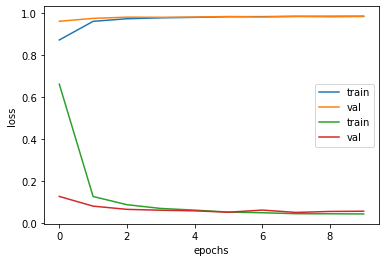

In [ ]:
c = CNN()
X, Xval, y, yval = c.ModelReady(mnist.load_data())
model = c.BuildClassifier(y.shape[1], X.shape[1], 1, 3, 3, 2, 'relu', 'adam', True, 'accuracy')
trained = c.Train(X, y, model, quiet=False)

In [ ]:
c.Evaluate(trained, X, Xval, y, yval)

938/938 [==============================] - 14s 15ms/step - loss: 0.0236 - accuracy: 0.9932
[0.0235944502055645, 0.9932000041007996]
157/157 [==============================] - 2s 15ms/step - loss: 0.0434 - accuracy: 0.9859
[0.04338335990905762, 0.9858999848365784]


predicted: 1


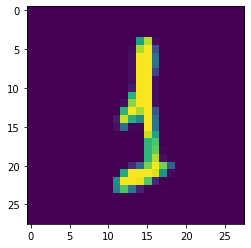

In [ ]:
def RunPrediction(model, image):
    image = image.reshape(1, Xval.shape[1], Xval.shape[2], Xval.shape[3])
    predicted = cnn2.predict(image).argmax()
    print('predicted: {}'.format(predicted))
    try:
      plt.imshow(image.reshape(Xval.shape[1], Xval.shape[2], Xval.shape[3]))
    except:
      plt.imshow(image.reshape(Xval.shape[1], Xval.shape[2]))

RunPrediction(trained, Xval[900])